## Домашняя работа

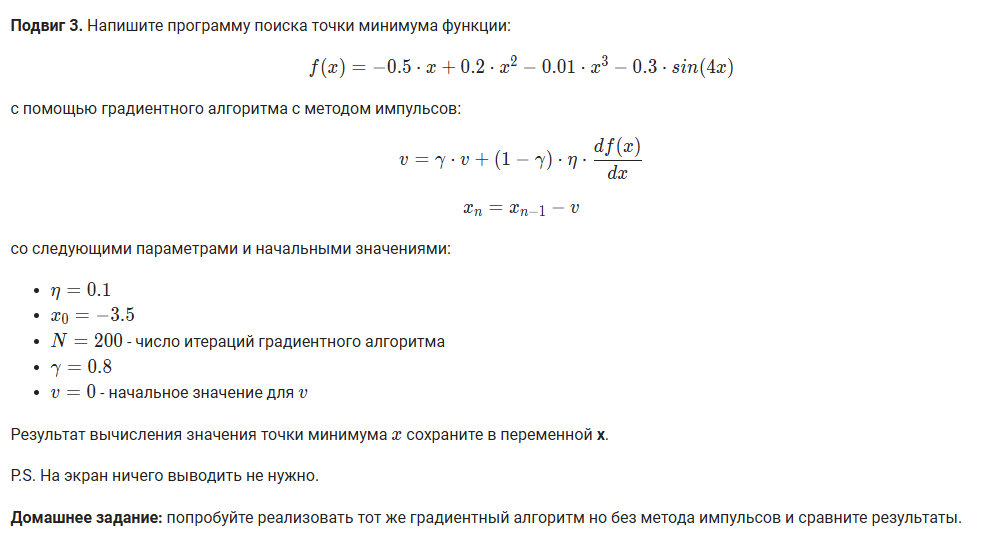

#### Momentum

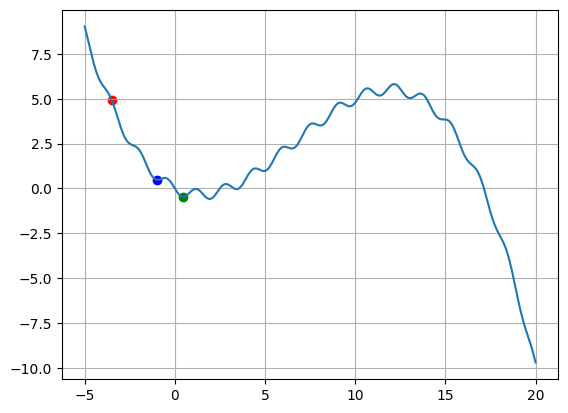

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.01 * x ** 3 - 0.3 * np.sin(4*x)

def df(x):
    return -0.5 + 0.4*x - 0.03*x**2 - 1.2 * np.cos(4*x)

eta = 0.1
x0 = -3.5
N = 200
lm = 0.8
v = 0

# изначальная точка
plt.scatter(x0, func(x0), c='red')

# momentum
eta = 0.1
x0 = -3.5
N = 200
lm = 0.8
v = 0

# оптимизированная momentum
for i in range(N):
    v = lm * v + (1 - lm) * eta * df(x0)
    x0 -= v
plt.scatter(x0, func(x0), c='green')

x0 = -3.5

# оптимизированная SGD
for i in range(N):
    x0 -= eta * df(x0)
plt.scatter(x0, func(x0), c='blue')

coord_x = np.linspace(-5.0, 20.0, 400)
coord_y = func(coord_x)

plt.plot(coord_x, coord_y)
plt.grid(True)

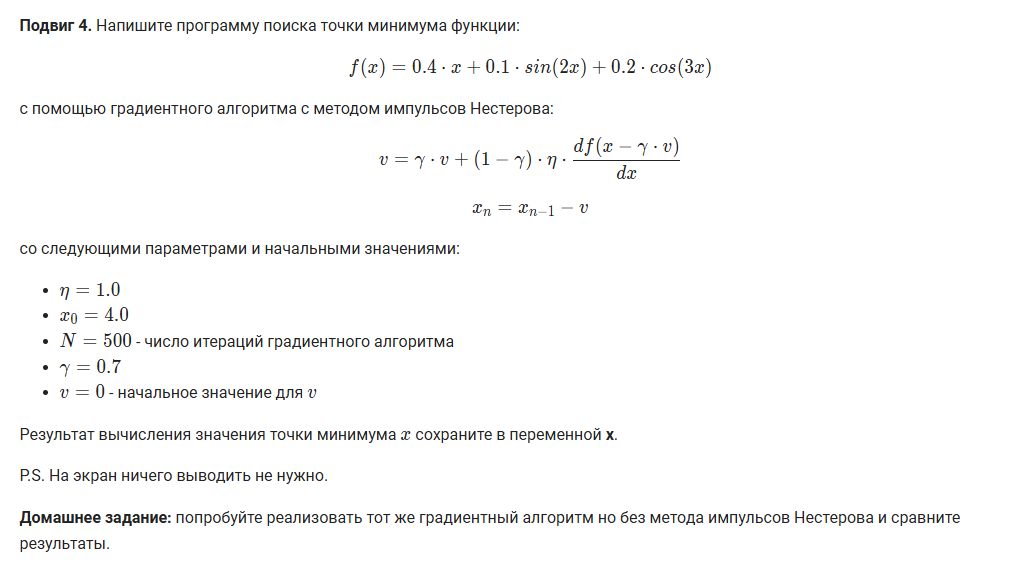

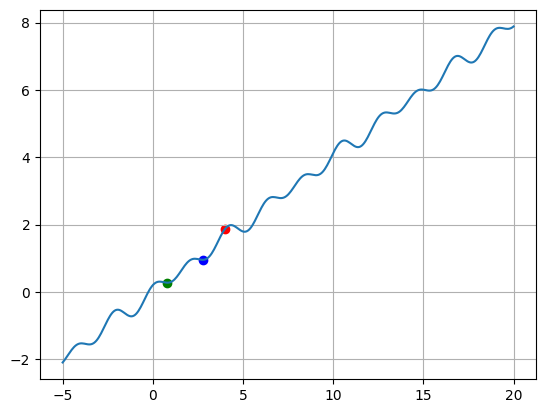

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return 0.4 * x + 0.1 * np.sin(2*x) + 0.2 * np.cos(3*x)

def df(x):
    return 0.4 + 0.2*np.cos(2*x) - 0.6 * np.sin(3*x)

eta = 1.
x0 = 4
N = 500
lm = 0.7
v = 0

# изначальная точка
plt.scatter(x0, func(x0), c='red')

# оптимизированная momentum Нестерова
for i in range(N):
    v = lm * v + (1 - lm) * eta * df(x0 - lm * v)
    x0 -= v
plt.scatter(x0, func(x0), c='green')

x0 = 4

# оптимизированная SGD
for i in range(N):
    x0 -= eta * df(x0)
plt.scatter(x0, func(x0), c='blue')

coord_x = np.linspace(-5.0, 20.0, 400)
coord_y = func(coord_x)

plt.plot(coord_x, coord_y)
plt.grid(True)

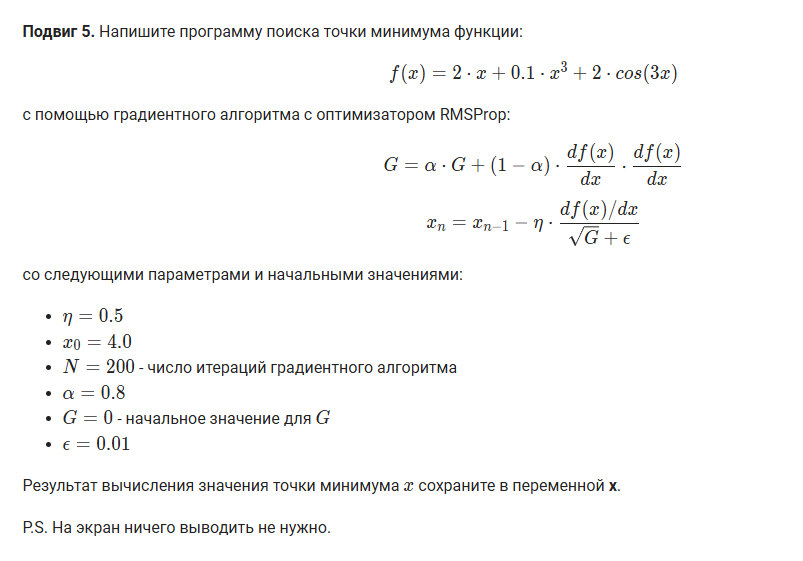

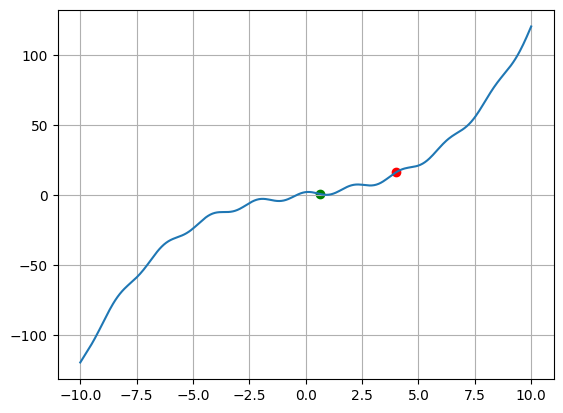

In [45]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return 2 * x + 0.1 * x ** 3 + 2 * np.cos(3*x)


def df(x):
    return 2 + 0.3 * x ** 2 - 6 * np.sin(3*x)

eta = 0.5
x0 = 4
N = 200
a = 0.8
G = 0
eps = 0.01

# начальная точка
plt.scatter(x0, func(x0), c='red')

# оптимизированная RMSProp
for i in range(N):
    G = a * G + (1 - a) * df(x0) * df(x0)
    x0 -= eta * df(x0) / (G ** 0.5 + eps)
plt.scatter(x0, func(x0), c='green')

coord_x = np.linspace(-10.0, 10.0, 400)
coord_y = func(coord_x)

plt.plot(coord_x, coord_y)
plt.grid(True)

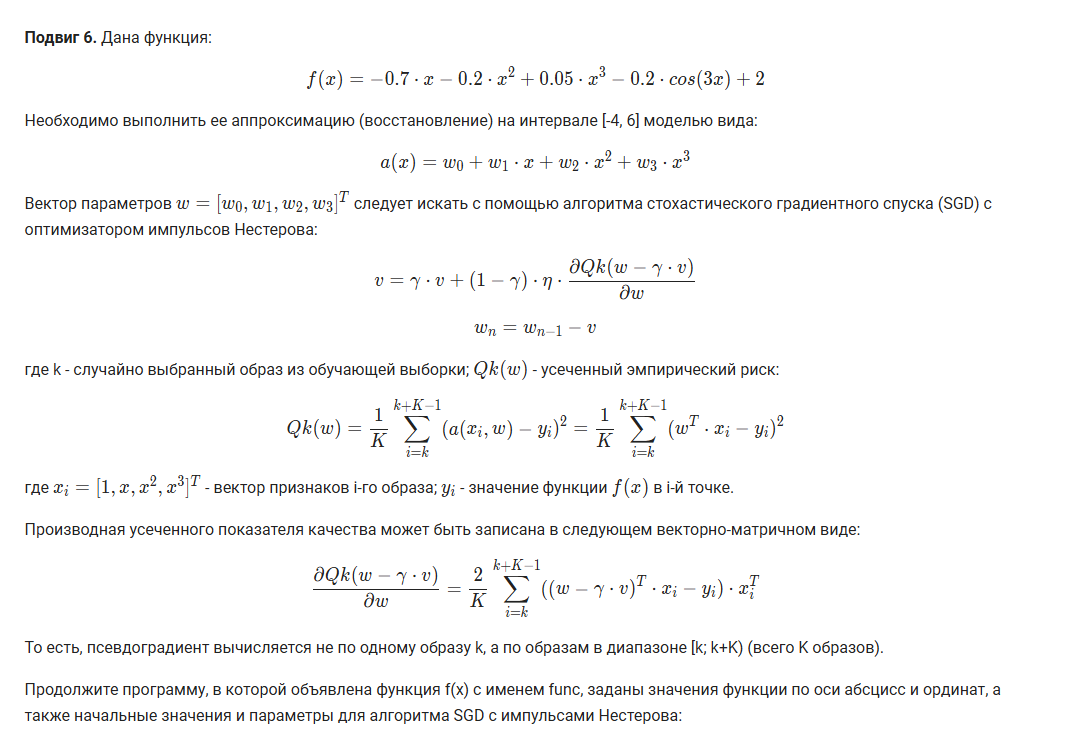
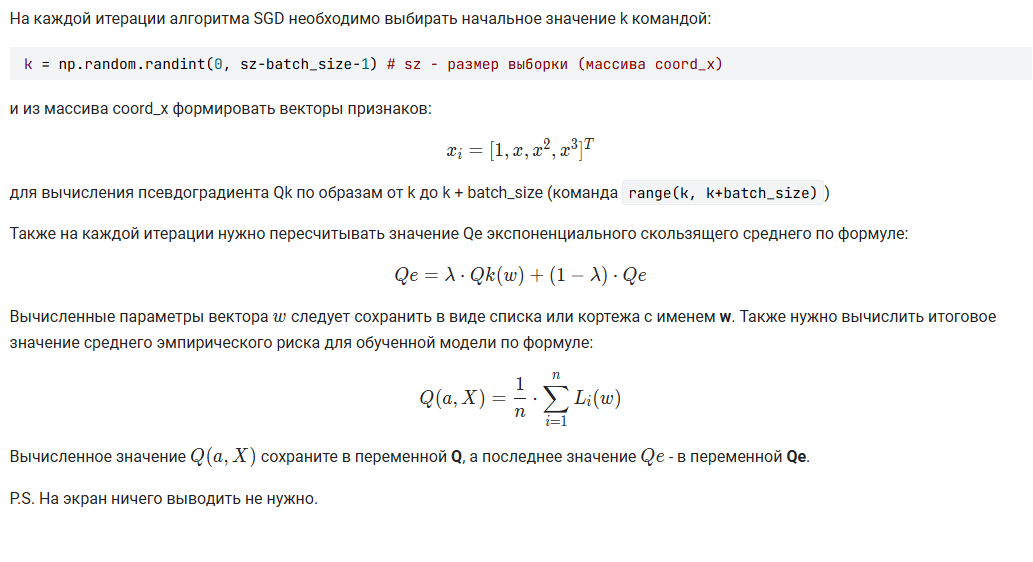

In [78]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return -0.7 * x - 0.2 * x ** 2 + 0.05 * x ** 3 - 0.2 * np.cos(3 * x) + 2

def Qk(w, x, y):
    return np.mean((w.T @ x - y) ** 2)

def dQk(w, x, y):
    return 2/batch_size * (w.T @ x - y) @ x.T


coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

X = np.array([[1, x, x**2, x**3] for x in coord_x])

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]).T # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)
gamma = 0.8 # коэффициент гамма для вычисления импульсов Нестерова
v = np.zeros(len(w))  # начальное значение [0, 0, 0, 0]

Qe = Qk(w, X.T, coord_y) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    eps = Qk(w, X[k:k+batch_size].T, coord_y[k:k+batch_size])
    v = gamma * v + (1 - gamma) * eta * dQk(w - gamma * v, X[k:k+batch_size].T, coord_y[k:k+batch_size])
    w = w - v
    Qe = lm * eps + (1 - lm) * Qe

Q = Qk(w, X.T, coord_y)
Q, Qe, w

(0.02023818813679436,
 0.021589776285582812,
 array([ 2.00087266, -0.69417019, -0.1972715 ,  0.04912324]))

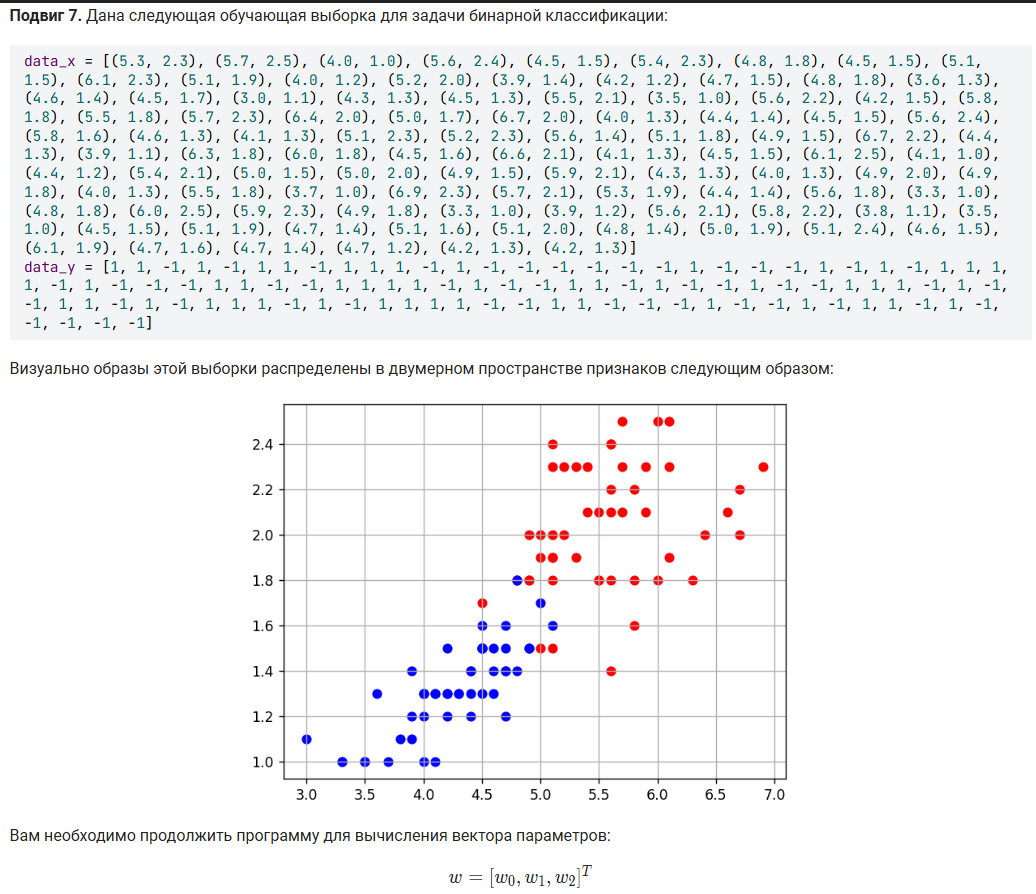
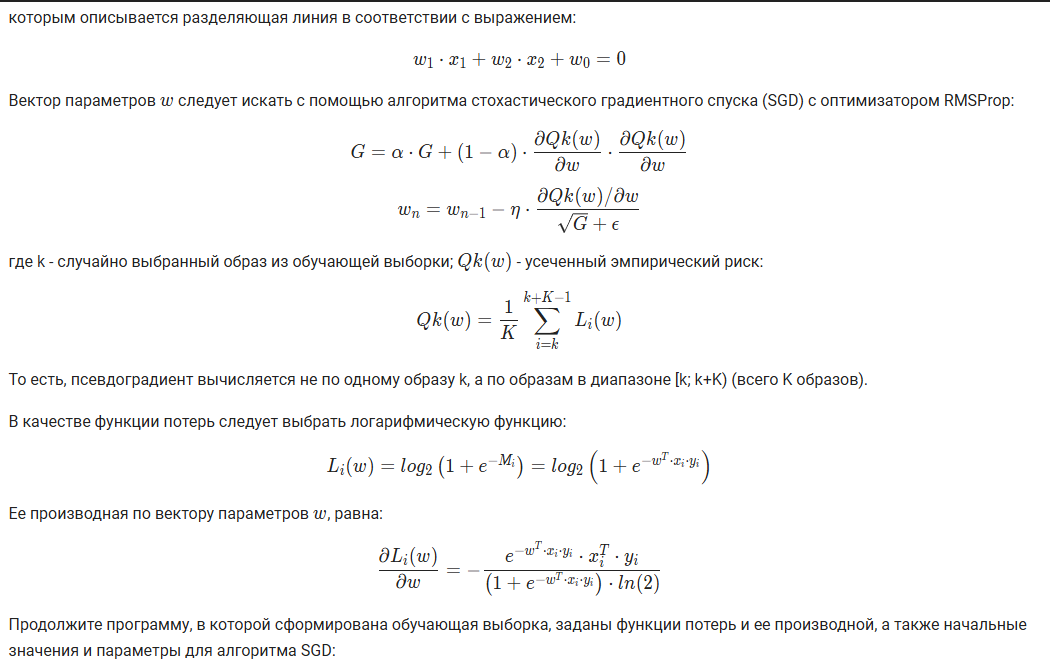
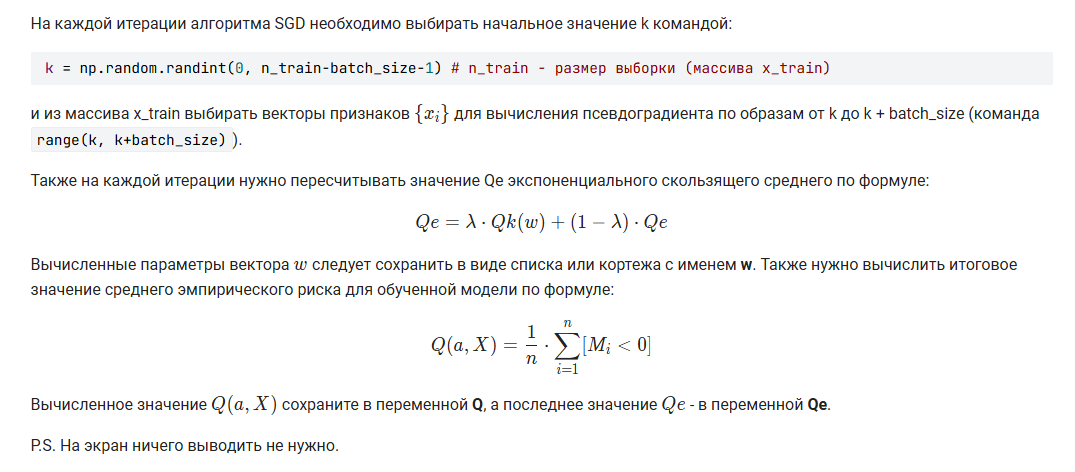

In [100]:
import numpy as np


# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))


# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

def df_all(w, X, Y):
    return np.mean([df(w, x.T, y) for x, y in zip(X, Y)], axis=0)


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = np.array([0.0, 0.0, 0.0]).T  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD
batch_size = 10 # размер мини-батча (величина K = 10)

alpha = 0.7 # параметр для RMSProp
G = np.zeros(len(w))  # параметр для RMSProp
eps = 0.01 # параметр для RMSProp

Qe = np.mean(loss(w, x_train.T, y_train)) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    qk = np.mean(loss(w, x_train[k:k+batch_size].T, y_train[k:k+batch_size]))
    G = alpha * G + (1 - alpha) * df_all(w, x_train[k:k+batch_size], y_train[k:k+batch_size]) * df_all(w, x_train[k:k+batch_size], y_train[k:k+batch_size])
    w = w - nt * df_all(w, x_train[k:k+batch_size], y_train[k:k+batch_size]) / (G ** 0.5 + eps)

    Qe = lm * qk + (1 - lm) * Qe

Q = np.mean(w.T @ x_train.T * y_train < 0)

Qe, Q, w

(0.7174181377501041, 0.06, array([-4.95162202,  0.38310615,  1.81559159]))